In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [5]:
df=pd.read_csv("TwitterHate.csv")
print(df.shape)


(24783, 7)


In [6]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (adjust this line according to your data source)
# df = pd.read_csv('path_to_your_data.csv') or any other DataFrame loading method

# Check column names
print("Column names in DataFrame:", df.columns)

# If 'label' is the correct name and exists, plot the histogram
if 'label' in df.columns:
    plt.hist(df['label'], bins=20, color='blue', alpha=0.7)  # Adjust bins, color, alpha as needed
    plt.title('Histogram of Labels')
    plt.xlabel('Label Values')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'label' does not exist. Check column names listed above.")

Column names in DataFrame: Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')
Column 'label' does not exist. Check column names listed above.


(array([ 1430.,     0.,     0.,     0.,     0., 19190.,     0.,     0.,
            0.,  4163.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

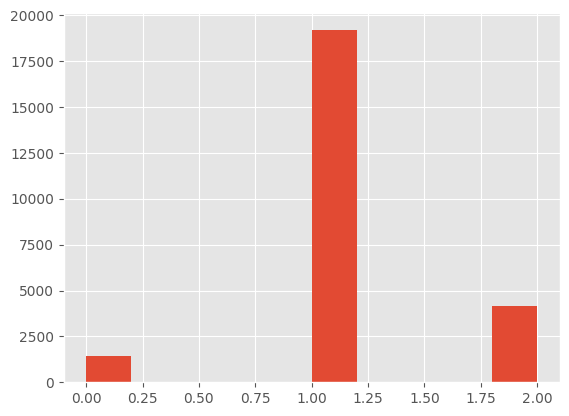

In [9]:
plt.hist(df['class'])

In [10]:
df["labels"]=df['class'].map({0:'no hate speech',1:'hate speech detected'})
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,NaN
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,hate speech detected
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,hate speech detected
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,hate speech detected
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,hate speech detected


In [11]:
import re
import nltk
import string
from nltk.util import pr
from nltk.corpus import stopwords
stopword =set(stopwords.words("english"))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
pst_stem=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
def clean(text):
    text=str(text).lower() 
    text=re.sub('\([<.*?>:;)]','',text)
    text=re.sub('https?:/\S+|www.\S+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n', '',text)
    text=re.sub(r'\w*\d\w*','',text)
    text=re.sub('ð\S+','',text)
    text= word_tokenize(text)
    
    text= [word for word in text if  word not in stopword]
    text=[pst_stem.stem(word) for word in text]
    
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

<>:3: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Hp\AppData\Local\Temp\ipykernel_23068\2578947401.py:3: SyntaxWarning: invalid escape sequence '\('
  text=re.sub('\([<.*?>:;)]','',text)
C:\Users\Hp\AppData\Local\Temp\ipykernel_23068\2578947401.py:4: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?:/\S+|www.\S+','',text)
C:\Users\Hp\AppData\Local\Temp\ipykernel_23068\2578947401.py:8: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('ð\S+','',text)


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                labels  
0  rt mayasolov woman shouldnt complain clean hou...                   NaN  
1   rt boy dat coldtyga dwn bad cuffin dat hoe place  hate speech detected  
2  rt urkindofbrand dawg rt ever fuck bitch start...  hate speech detected  
3             rt cganderson vivabas look like tranni  hate speech detected  
4  rt shenikarobert shit hear might true might fa...  hate speech detected  


In [13]:
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    tweet="".join(tweet)
    return tweet
df['tweet'] = df['tweet'].apply(lemmatizing)

In [14]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean hou...,NaN
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe place,hate speech detected
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch start...,hate speech detected
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni,hate speech detected
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might fa...,hate speech detected


<Axes: xlabel='class', ylabel='count'>

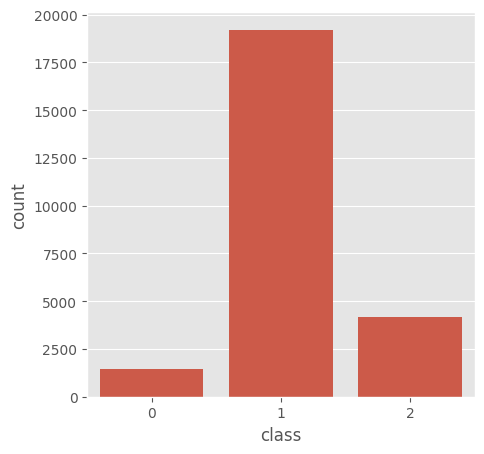

In [15]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='class', data = df)

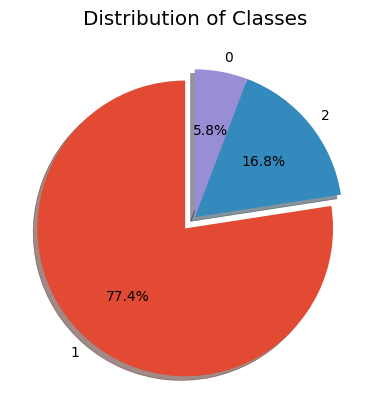

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame loading; replace with your actual data loading method
# df = pd.read_csv('path_to_your_data.csv')

# Count the number of unique categories in 'class'
num_categories = df['class'].nunique()

# Generate an 'explode' tuple with one category slightly exploded
explode_values = [0.1 if i == 0 else 0 for i in range(num_categories)]  # Exploding the first category

# Plotting the pie chart
df['class'].value_counts().plot(
    kind='pie',
    explode=explode_values,  # Using the dynamically created explode tuple
    autopct='%1.1f%%',
    shadow=True,  # Optional: Adds a shadow for better visual effect
    startangle=90  # Optional: Starts the first pie slice at 90 degrees
)

plt.title('Distribution of Classes')
plt.ylabel('')  # Hide the y-label as it's typically unnecessary for pie charts
plt.show()


In [17]:
print("total ", len(df))
no_hate = df[df['class'] == 0]
print("no hate", len(no_hate))
hate = df[df['class'] == 1]
print("hate", len(hate))


total  24783
no hate 1430
hate 19190


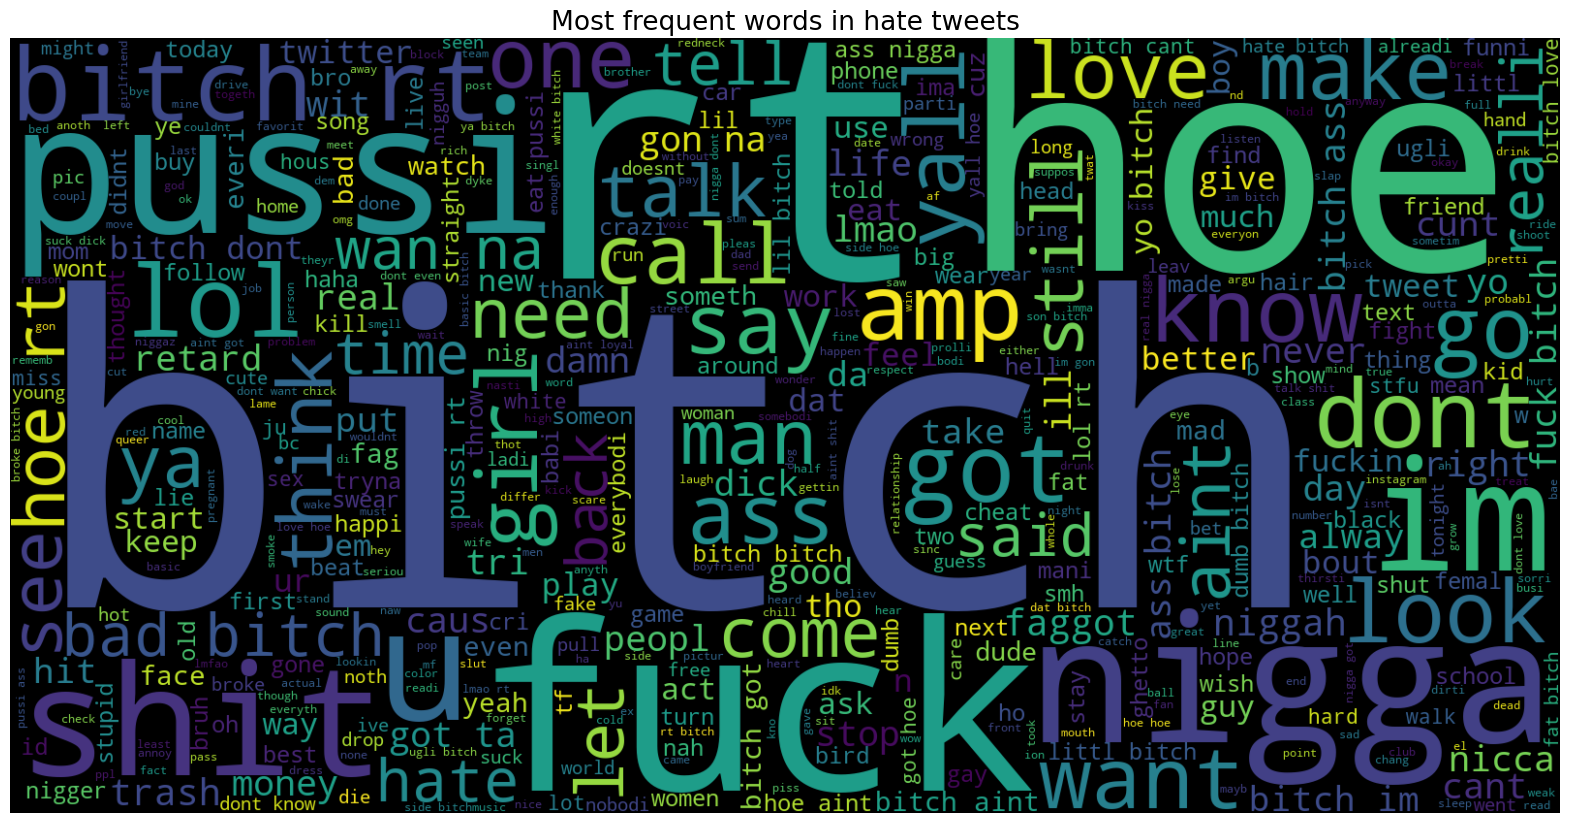

In [18]:
from wordcloud import WordCloud
hate_tweets=df[df['class']==1]
hate_tweets.head()
text = ' '.join([word for word in hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

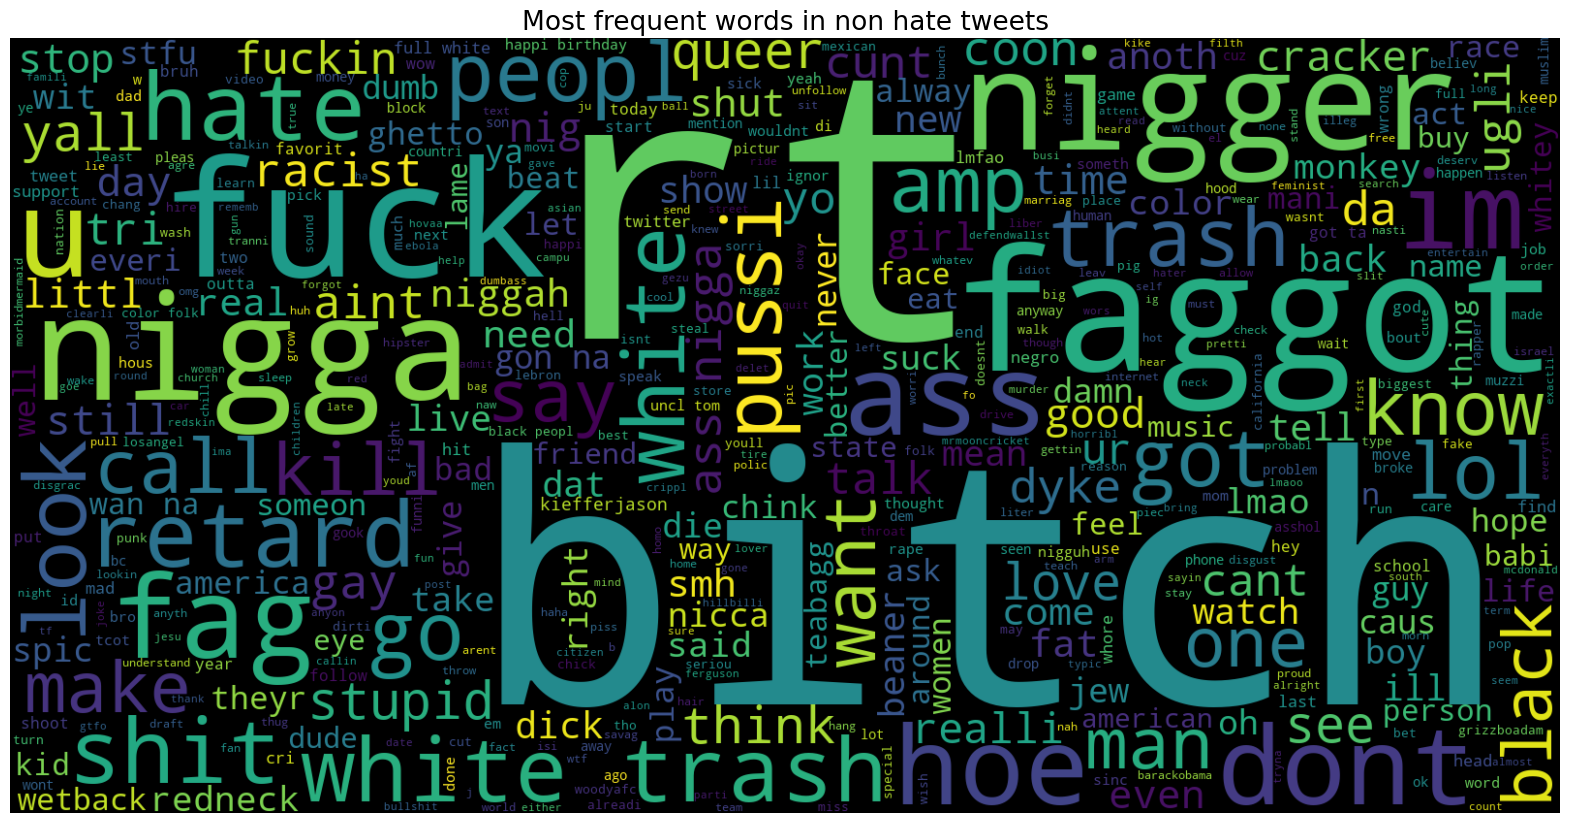

In [19]:
from wordcloud import WordCloud
no_hate_tweets=df[df['class']==0]
hate_tweets.head()
text = ' '.join([word for word in no_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
df = df.dropna()

In [22]:
# Replacing NaN values in the 'tweet' column with an empty string
df['tweet'] = df['tweet'].fillna('')

# If 'labels' is numeric and has NaN, you might use median or mode to fill
# Here's how you could fill with the mode (most frequent value)
if df['labels'].dtype in ['int64', 'float64']:
    mode_value = df['labels'].mode()[0]
    df['labels'] = df['labels'].fillna(mode_value)


In [23]:
# Check again to make sure there are no NaN values
print(df.isnull().sum())


Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
labels                0
dtype: int64


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Assuming 'df' is your DataFrame

# Handle missing values
df['tweet'] = df['tweet'].fillna('')
df['labels'] = df['labels'].fillna(df['labels'].mode()[0])

# Convert columns to numpy arrays
x = np.array(df['tweet'])
y = np.array(df['labels'])

# Vectorizing text data
cv = CountVectorizer()
x = cv.fit_transform(x)

# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=54)

# List to store accuracies and model names
accuracy = []
name = []

# Logistic Regression
clf = LogisticRegression()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("logistic", accuracy_score(y_test, predict))
accuracy.append(accuracy_score(y_test, predict))
name.append("Logistic")
print("CLASSIFICATION REPORT \n", classification_report(y_test, predict))

# Additional models can be evaluated following the same pattern

logistic 0.9351762043323634
CLASSIFICATION REPORT 
                       precision    recall  f1-score   support

hate speech detected       0.95      0.98      0.97      5792
      no hate speech       0.48      0.22      0.30       394

            accuracy                           0.94      6186
           macro avg       0.71      0.60      0.63      6186
        weighted avg       0.92      0.94      0.92      6186



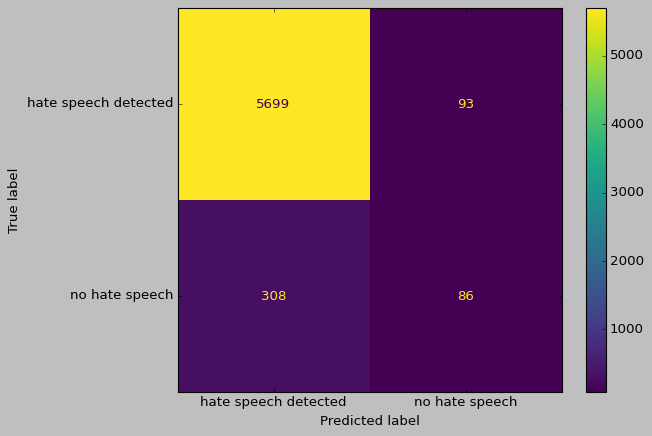

In [25]:
style.use('classic')
cm = confusion_matrix(y_test,predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()